In [ ]:
import os 

root_dir = r"/beegfs/ws/1/issr292b-workspace_MK1/dataset/"
arr = os.listdir('/beegfs/ws/1/issr292b-workspace_MK1/dataset/')

for r, d, f in os.walk(root_dir):
    for file in f:
        if file.endswith(".png"):
            url = os.path.join(r, file)
            file_name.append(url)
            print(url)

In [ ]:
for i in range(0, len(df)):
    if 'aml' in df['File_name'][i]:
        print("aml")
        new_label.append('1')
    elif 'apl' in df['File_name'][i]:
        print("apl")
        new_label.append('0')
    elif 'healthy' in df['File_name'][i]:
        print("healthy")
        new_label.append('2')             

In [ ]:
import pandas as pd

real_data = pd.read_csv('real_data.csv')
fake_data = pd.read_csv('fake_data.csv')

apl_h_real = real_data[(real_data["new_label"]==0) | (real_data["new_label"] == 2)]
apl_h_fake = fake_data[(fake_data["label"]==0) | (fake_data["label"] == 2)]

apl_h_real = apl_h_real.reset_index(drop=True)
apl_h_fake = apl_h_fake.reset_index(drop=True)

apl_h_real = apl_h_real.rename(columns={"new_label": "label"})

for i in range(0, len(apl_h_fake)):
    if 'apl' in apl_h_fake['File_name'][i]:
        apl_h_fake['label'][i] = 0
    if 'healthy' in apl_h_fake['File_name'][i]:
        apl_h_fake['label'][i] = 1
        


In [41]:
p = Path('/beegfs/ws/1/issr292b-workspace_MK1/apl_h/')

apl_h_train = pd.read_csv(Path(p, 'apl_h_real.csv'))
apl_h_train = apl_h_train.sample(frac = 0.8)
apl_h_train = apl_h_train.reset_index(drop=True)
apl_h_train.to_csv('apl_h_train.csv', index =False)


In [ ]:
import pandas as pd
import numpy as np

aml_apl_train = pd.read_csv('aml_apl_train.csv')
aml_apl_fake = pd.read_csv('aml_apl_fake.csv')

aml_apl_1 = aml_apl_train.sample(n = int(0.00*len(aml_apl_train)))
aml_apl_2 = aml_apl_fake.sample(n = int(1*len(aml_apl_train)))

aml_apl_train_40_60 = pd.concat([aml_apl_1, aml_apl_2], axis=0)
aml_apl_train_40_60 = aml_apl_train_40_60.sample(frac = 1)
aml_apl_train_40_60.to_csv('aml_apl_train_0_100.csv', index=False)



For generating train csv file

In [42]:
import pandas as pd
import numpy as np
from sklearn.utils import shuffle

from pathlib import Path


p = Path('/beegfs/ws/1/issr292b-workspace_MK1/apl_h/')

aml_apl_train = pd.read_csv(Path(p, 'apl_h_train.csv'))
aml_apl_fake = pd.read_csv(Path(p, 'apl_h_fake.csv'))

x = 0

while x <110 :
    aml_apl_1 = aml_apl_train.sample(n = int((x/100)*len(aml_apl_train)))
    aml_apl_2 = aml_apl_fake.sample(n = int(((100-x)/100)*len(aml_apl_train)))
    aml_apl_train_combined = pd.concat([aml_apl_1, aml_apl_2], axis=0)
    aml_apl_train_combined = shuffle(aml_apl_train_combined)
    aml_apl_train_combined.to_csv(Path(p, 'apl_h_train_' + str(x) + '_' + str((100-x)) + '.csv'), index=False)
    x+=10


In [3]:
import pandas as pd
import numpy as np
from sklearn.utils import shuffle
from pathlib import Path

base_dir = Path('/beegfs/ws/1/issr292b-workspace_MK1/aml_h/')

aml_h_train = pd.read_csv(Path(base_dir, 'aml_h_train.csv'))
aml_h_fake = pd.read_csv(Path(base_dir, 'aml_h_fake.csv'))

x = 60

train_csv = shuffle(aml_h_train.sample(n = int((x/100)*len(aml_h_train))))
train_csv['target'] = train_csv['File_name'].apply(lambda x: 0 if 'fake' in x else 1)
                
X = train_csv['File_name']
y = train_csv['target']
        
n_splits = 5
        
skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)
        
for fold_num, (train_index, test_index) in enumerate(skf.split(X, y)):
    print(f"Fold {fold_num}:")
            
    train_data_file = train_csv.iloc[train_index]
    test_data_file= train_csv.iloc[test_index]
            
    train_data_file = train_data_file.drop(columns=['target'])
    test_data_file = test_data_file.drop(columns=['target'])
            
    folder_name = '{}_{}_split_{}_stratified'.format(i, 100-i, fold_num)
            
    csv_filename_dump_train = 'aml_h_train_{}_{}_split_{}_stratified.csv'.format(i, 100-i, fold_num)
    csv_filename_dump_test = 'aml_h_test_{}_{}_split_{}_stratified.csv'.format(i, 100-i, fold_num)
            
    sfold_path_train = base_dir / folder_name / csv_filename_dump_train
    sfold_path_test = base_dir / folder_name / csv_filename_dump_test
            
    train_data_file.to_csv(sfold_path_train, index=False)    
    test_data_file.to_csv(sfold_path_test, index=False)







In [ ]:
import pandas as pd
import numpy as np
from sklearn.utils import shuffle
from pathlib import Path
from sklearn.model_selection import StratifiedKFold
import os

# Define the base directory
base_dir = Path('/beegfs/ws/1/issr292b-workspace_MK1/aml_h/')

# Load the training and fake data from CSV files
aml_h_train = pd.read_csv(Path(base_dir, 'aml_h_train.csv'))
aml_h_fake = pd.read_csv(Path(base_dir, 'aml_h_fake.csv'))

# Define the fixed percentage of aml_h_train
fixed_percentage_train = 60
fixed = int((60/100)*len(aml_h_train))  #60% of aml_h_train
print('train me se:' + str(fixed))

# Calculate the total number of fake samples based on the length of aml_h_train
total_fake_samples = len(aml_h_train) - int((fixed_percentage_train / 100) * len(aml_h_train))

# Define the number of splits for stratified k-fold cross-validation
n_splits = 5

# Iterate through the incremental percentages of aml_h_fake up to 100%
for percent_fake in range(0, 101, 10):  # 0%, 10%, 20%, ... 100%
    # Calculate the number of samples to include from aml_h_fake based on the total number
    num_samples_fake = int((percent_fake / 100) * total_fake_samples)
    print('fake samples number:', str(num_samples_fake))
    
    # Concatenate a fixed percentage of aml_h_train and the calculated number of aml_h_fake samples
    combined_data_1 = aml_h_train.sample(n=fixed)
    combined_data_2 = aml_h_fake.sample(n=num_samples_fake)
    combined_data = pd.concat([combined_data_1, combined_data_2], axis=0)
                            
    print("final data size:", len(combined_data))
    
    # Shuffle the combined dataset
    combined_data = shuffle(combined_data)
    

    # Add the 'target' column based on string search condition
    combined_data['target'] = combined_data['File_name'].apply(lambda x: 0 if 'fake' in x else 1)
    
    # Separate features (X) and target (y)
    X = combined_data['File_name']
    y = combined_data['target']

    # Initialize StratifiedKFold with shuffling
    skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

    # Iterate through each fold
    for fold_num, (train_index, test_index) in enumerate(skf.split(X, y)):
        print(f"Combination {fixed_percentage_train}_fake{percent_fake}_split{fold_num}_stratified:")

        # Extract the training and testing data for this fold
        train_data_file = combined_data.iloc[train_index]
        test_data_file = combined_data.iloc[test_index]

        # Remove the 'target' column from the training and testing datasets
        train_data_file = train_data_file.drop(columns=['target'])
        test_data_file = test_data_file.drop(columns=['target'])

        # Create a folder for this fold within the base directory
        folder_name = f'{fixed_percentage_train}_{percent_fake}_split_{fold_num}_stratified'
        fold_folder = base_dir / folder_name
        fold_folder.mkdir(parents=True, exist_ok=True)

        # Define filenames for training and testing CSV files
        csv_filename_dump_train = f'aml_h_train_{fixed_percentage_train}_{percent_fake}_split_{fold_num}_stratified.csv'
        csv_filename_dump_test = f'aml_h_test_{fixed_percentage_train}_{percent_fake}_split_{fold_num}_stratified.csv'

        # Define file paths for training and testing CSV files
        sfold_path_train = fold_folder / csv_filename_dump_train
        sfold_path_test = fold_folder / csv_filename_dump_test

        # Save the training and testing datasets to CSV files
        train_data_file.to_csv(sfold_path_train, index=False)
        test_data_file.to_csv(sfold_path_test, index=False)


In [ ]:
from path import Path 
import os
import numpy as np
import pandas as pd

p = Path('/beegfs/ws/1/issr292b-workspace_MK1/aml_h/')

for i in range(0,100,10):
    for x in range (0,5):
        directory = '{}_{}_split_{}'.format(i, 100-i, x)
        pth = os.path.join(p, directory)
        
        print(Path(pth, 'aml_h_train_' + str(i) + '_' + str(100-i) + '_fold_'+ str(x) + '.csv'))
        train_csv = pd.read_csv(Path(pth, 'aml_h_train_' + str(i) + '_' + str(100-i) + '_fold_'+ str(x) + '.csv'), encoding='utf-8')
        
        for z in range(0, len(train_csv)):
            if '.ipynb_checkpoints' in train_csv['File_name'][z]:
                train_csv = train_csv.drop(z)
                
        train_csv.to_csv(Path(pth, 'aml_h_train_' + str(i) + '_' + str(100-i) + '_fold_'+ str(x) + '.csv'), index=False)
    

In [ ]:
from path import Path 
import os
import numpy as np
import pandas as pd

base_directory = Path('/beegfs/ws/1/issr292b-workspace_MK1/aml_h/')

for i in range(0,101,10):
    for x in range (0,5):
        directory = '{}_{}_split_{}_stratified'.format(i, 100-i, x)
        directory_path = base_directory / directory
        
        csv_filename = f'aml_h_train_{i}_{100-i}_split_{x}_stratified.csv'
        csv_path = directory_path / csv_filename
        
        print(csv_path)
        
        try:
            train_csv = pd.read_csv(csv_path)
            for z in range(0, len(train_csv)):
                if '.ipynb_checkpoints' in train_csv['File_name'][z]:
                    train_csv = train_csv.drop(z)
            train_csv.to_csv(csv_path, index=False)
            
        except FileNotFoundError:
            print(f"File not found: {csv_path}")
            
        except pd.errors.ParserError:
            print(f"Error parsing CSV file: {csv_path}")

In [ ]:
from path import Path 
import os
import numpy as np
import pandas as pd

base_directory = Path('/beegfs/ws/1/issr292b-workspace_MK1/aml_h/')

i=60
for j in range(0,101,10):
    for x in range (0,5):
        directory = '{}_{}_split_{}_stratified'.format(60, j, x)
        directory_path = base_directory / directory
        
        csv_filename = f'aml_h_train_{60}_{j}_split_{x}_stratified.csv'
        csv_path = directory_path / csv_filename
        
        print(csv_path)
        
        try:
            train_csv = pd.read_csv(csv_path)
            for z in range(0, len(train_csv)):
                if '.ipynb_checkpoints' in train_csv['File_name'][z]:
                    train_csv = train_csv.drop(z)
            train_csv.to_csv(csv_path, index=False)
            
        except FileNotFoundError:
            print(f"File not found: {csv_path}")
            
        except pd.errors.ParserError:
            print(f"Error parsing CSV file: {csv_path}")

In [ ]:
from path import Path 
import os
import numpy as np
import pandas as pd

base_directory = Path('/beegfs/ws/1/issr292b-workspace_MK1/aml_h/')

i=60
for j in range(0,101,10):
    for x in range (0,5):
        directory = '{}_{}_split_{}_stratified'.format(60, j, x)
        directory_path = base_directory / directory
        
        csv_filename = f'aml_h_test_{60}_{j}_split_{x}_stratified.csv'
        csv_path = directory_path / csv_filename
        
        print(csv_path)
        
        try:
            test_csv = pd.read_csv(csv_path)
            for z in range(0, len(test_csv)):
                if '.ipynb_checkpoints' in test_csv['File_name'][z]:
                    test_csv = test_csv.drop(z)
            test_csv.to_csv(csv_path, index=False)
            
        except FileNotFoundError:
            print(f"File not found: {csv_path}")
            
        except pd.errors.ParserError:
            print(f"Error parsing CSV file: {csv_path}")

In [ ]:
from path import Path 
import os
import numpy as np
import pandas as pd

base_directory = Path('/beegfs/ws/1/issr292b-workspace_MK1/aml_h/')

for i in range(0,110,10):
    for x in range (0,5):
        directory = '{}_{}_split_{}_stratified'.format(i, 100-i, x)
        directory_path = base_directory / directory
        
        csv_filename = f'aml_h_test_{i}_{100-i}_split_{x}_stratified.csv'
        csv_path = directory_path / csv_filename
        
        print(csv_path)
        
        try:
            test_csv = pd.read_csv(csv_path)
            for z in range(0, len(test_csv)):
                if '.ipynb_checkpoints' in test_csv['File_name'][z]:
                    test_csv = test_csv.drop(z)
            test_csv.to_csv(csv_path, index=False)
            
        except FileNotFoundError:
            print(f"File not found: {csv_path}")
            
        except pd.errors.ParserError:
            print(f"Error parsing CSV file: {csv_path}")

In [ ]:
import os
import tempfile
import torch
import numpy as np
from sklearn.metrics import roc_curve, auc
from matplotlib import pyplot as plt
import pandas as pd

def calc_log_ROC(model, data_loader, device, classes, cv_str):
    # Calculate ROC curve, create and save matplotlib fig, send to mlflow

    # Only tested for binary classification, not distributed mode and GPU
    model.eval()
    with torch.no_grad():
        result = torch.cuda.FloatTensor()
        targets = torch.cuda.LongTensor()
        for image, target in data_loader:
            image = image.to(device, non_blocking=True)
            target = target.to(device, non_blocking=True)
            output = model(image)
            m = torch.nn.Softmax(dim=1)
            output = m(output)
            result = torch.cat((result, output), dim=0)
            targets = torch.cat((targets, target), dim=0)

    class_of_interest = len(classes) - 1

    y = targets.cpu()
    scores = result[:, class_of_interest].cpu()
    fpr, tpr, thresholds = roc_curve(y, scores, pos_label=class_of_interest)
    roc_auc = auc(fpr, tpr)

    plt.figure()
    lw = 2
    plt.plot(fpr, tpr, color='darkorange',
             lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='black', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")

    with tempfile.TemporaryDirectory() as tmpdirname:
        savepath = os.path.join(tmpdirname, f'{cv_str}ROC.png')
        plt.savefig(savepath, dpi=1000)

        # Create a DataFrame to store FPR and TPR
        roc_data = pd.DataFrame({'FPR': fpr, 'TPR': tpr})

        # Add a header with the name of the run to the DataFrame
        roc_data.insert(0, 'RunName', cv_str)

        # Save the FPR and TPR data to a CSV file
        csv_path = os.path.join(tmpdirname, f'{cv_str}ROC.csv')
        roc_data.to_csv(csv_path, index=False)

        # Log both the ROC plot and CSV as MLflow artifacts
        retry(lambda: mlflow.log_artifact(savepath, artifact_path=f"{cv_str}ROC_Curve"), 5, "Could not log ROC plot")
        retry(lambda: mlflow.log_artifact(csv_path, artifact_path=f"{cv_str}ROC_Data"), 5, "Could not log ROC data")


In [5]:
import os
from pathlib import Path
import shutil

p = Path('/beegfs/ws/1/issr292b-workspace_MK1/aml_h/')

for i in range(0,100,10):
    for x in range (0,5):
        directory = '{}_{}_split_{}'.format(i, 100-i, x)
        path = os.path.join(p, directory)
        os.mkdir(path)
    #src_path = r"/beegfs/ws/1/issr292b-workspace_MK1/aml_apl/aml_apl_test.csv"
    #des_path = path
    #shutil.copy(src_path, des_path)
    

    


In [ ]:
import os
from path import Path
import shutil
import pandas as pd
from sklearn.model_selection import StratifiedKFold

base_dir = Path('/beegfs/ws/1/issr292b-workspace_MK1/aml_h/')

for i in range(0,110,10):
    #for x in range (0,5):
        #folder_name = '{}_{}_split_{}_stratified'.format(i, 100-i, x)
        #path = os.path.join(base_dir, folder_name)
        #os.mkdir(path)
        
    csv_filename_extract = f'aml_h_train_{i}_{100-i}.csv'
    csv_path = base_dir / csv_filename_extract
        
    print(csv_path)
    
    
    try:
        train_csv = pd.read_csv(csv_path)
        train_csv['target'] = train_csv['File_name'].apply(lambda x: 0 if 'fake' in x else 1)
                
        X = train_csv['File_name']
        y = train_csv['target']
        
        n_splits = 5
        
        skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)
        
        for fold_num, (train_index, test_index) in enumerate(skf.split(X, y)):
            print(f"Fold {fold_num}:")
            
            train_data_file = train_csv.iloc[train_index]
            test_data_file= train_csv.iloc[test_index]
            
            train_data_file = train_data_file.drop(columns=['target'])
            test_data_file = test_data_file.drop(columns=['target'])
            
            folder_name = '{}_{}_split_{}_stratified'.format(i, 100-i, fold_num)
            
            csv_filename_dump_train = 'aml_h_train_{}_{}_split_{}_stratified.csv'.format(i, 100-i, fold_num)
            csv_filename_dump_test = 'aml_h_test_{}_{}_split_{}_stratified.csv'.format(i, 100-i, fold_num)
             
            sfold_path_train = base_dir / folder_name / csv_filename_dump_train
            sfold_path_test = base_dir / folder_name / csv_filename_dump_test
            
            train_data_file.to_csv(sfold_path_train, index=False)    
            test_data_file.to_csv(sfold_path_test, index=False)
         
    except FileNotFoundError:
        print(f"File not found: {csv_path}")
        
    except pd.errors.ParserError:
        print(f"Error parsing CSV file: {csv_path}")
        
    
        
        
    
    
    

In [ ]:
import numpy as np
from sklearn.model_selection import KFold
from pathlib import Path
import pandas as pd

p = Path('/beegfs/ws/1/issr292b-workspace_MK1/aml_h/')



skf = KFold(n_splits=5)
aml_h_train = pd.read_csv(Path(p, 'aml_h_train_0_100.csv'))
aml_h_test = pd.read_csv(Path(p, 'aml_h_test.csv'))

skf.get_n_splits(aml_h_train)

print(skf)

for i, (train_index, test_index) in enumerate(skf.split(aml_h_train)):
    print(f"Fold {i}:")
    #print(f"  Train: index={train_index}")
    print(f"  Test:  index={test_index}")
    aml_h_train_100_0_F = aml_h_train.iloc[train_index]
    aml_h_test_100_0_f = aml_h_train.iloc[test_index]
    aml_h_train_100_0_F.to_csv(Path(p, 'aml_h_train_0_100_fold_' + str(i) + '.csv'), index=False)
    aml_h_test_100_0_f.to_csv(Path(p, 'aml_h_test_0_100_fold_' + str(i) + '.csv'), index=False)



In [ ]:
import pandas as pd

aml_apl_train = pd.read_csv('aml_apl_train.csv')

In [ ]:
aml_apl_test = pd.read_csv('aml_apl_test.csv')
aml_apl_test.sample(frac=1, )
aml_apl_test.to_csv('aml_apl_test.csv', index=False)

In [ ]:
for i in range(0, len(apl_h)):
    if apl_h['label'][i] == 2:
        apl_h['label'][i] = 1
        
    

In [ ]:
df['split'] = np.random.randn(df.shape[0], 1)

msk = np.random.rand(len(df)) <= 0.7

train = df[msk]
test = df[~msk]

In [ ]:
import os 

root_dir = r"/beegfs/ws/1/issr292b-workspace_MK1/dataset/fake_data/"
arr = os.listdir('/beegfs/ws/1/issr292b-workspace_MK1/dataset/fake_data')

file_name = []



for r, d, f in os.walk(root_dir):
    for file in f:
        if file.endswith(".png"):
            url = os.path.join(r, file)
            file_name.append(url)
            print(url)

In [ ]:
for i in range(0, len(fake_data)):
    if 'aml' in fake_data['File_name'][i]:
        fake_data['label'][i] = 1
    if 'apl' in fake_data['File_name'][i]:
        fake_data['label'][i] = 0
    if 'healthy' in fake_data['File_name'][i]:
        fake_data['label'][i] = 2

   
        

In [ ]:
for i in range(0, len(aml_h_fake)):
    if 'aml' in aml_h_fake['File_name'][i]:
        aml_h_fake['label'][i] = 0
    if 'healthy' in aml_h_fake['File_name'][i]:
        aml_h_fake['label'][i] = 1

In [ ]:
for i in range(0, len(aml_h_real)):
    if 'aml' in aml_h_real['File_name'][i]:
        aml_h_real['label'][i] = 0
    if 'healthy' in aml_h_real['File_name'][i]:
        aml_h_real['label'][i] = 1

In [74]:
import pandas as pd
import numpy as np
from sklearn.utils import shuffle

from pathlib import Path
p = Path('/beegfs/ws/1/issr292b-workspace_MK1/aml_h')

aml_h_train = pd.read_csv(Path(p,'aml_h_train.csv'))
aml_h_fake = pd.read_csv(Path(p,'aml_h_fake.csv'))



x = 0

while x <110 :
    aml_h_1 = aml_h_train.sample(n = int((x/100)*len(aml_h_train)))
    aml_h_2 = aml_h_fake.sample(n = int(((100-x)/100)*len(aml_h_train)))
    aml_h_train_combined = pd.concat([aml_h_1, aml_h_2], axis=0)
    aml_h_train_combined = shuffle(aml_h_train_combined)
    aml_h_train_combined.to_csv(Path(p, 'aml_h_train_' + str(x) + '_' + str((100-x)) + '.csv'), index=False)
    x+=10


In [43]:
def find_all(name, path):
    result = []
    for root, dirs, files in os.walk(path):
        if name in files:
            result.append(os.path.join(root, name))
    return result

In [45]:
name = 'accuracy'
path = '/beegfs/ws/1/issr292b-workspace_MK1/classification_hema_pipeline/results/'

import os

file_list = find_all(name, path)

In [46]:
accuracy = {}
import pandas as pd
col_name = ["timestamp", "Accuracy", "Epoch"]

x = 100

for i in file_list:
    accuracy[x] =  pd.read_csv(i, names=col_name, sep=" ") 
    x = x-10

/beegfs/ws/1/issr292b-workspace_MK1/roc_data/60_20_strat_bal_cv0__ROC.csv
['60_20_strat_bal_cv0__ROC.csv']
/beegfs/ws/1/issr292b-workspace_MK1/roc_data/60_20_strat_bal_cv1__ROC.csv
['60_20_strat_bal_cv0__ROC.csv', '60_20_strat_bal_cv1__ROC.csv']
/beegfs/ws/1/issr292b-workspace_MK1/roc_data/60_20_strat_bal_cv2__ROC.csv
['60_20_strat_bal_cv0__ROC.csv', '60_20_strat_bal_cv1__ROC.csv', '60_20_strat_bal_cv2__ROC.csv']
/beegfs/ws/1/issr292b-workspace_MK1/roc_data/60_20_strat_bal_cv3__ROC.csv
['60_20_strat_bal_cv0__ROC.csv', '60_20_strat_bal_cv1__ROC.csv', '60_20_strat_bal_cv2__ROC.csv', '60_20_strat_bal_cv3__ROC.csv']
/beegfs/ws/1/issr292b-workspace_MK1/roc_data/60_20_strat_bal_cv4__ROC.csv
['60_20_strat_bal_cv0__ROC.csv', '60_20_strat_bal_cv1__ROC.csv', '60_20_strat_bal_cv2__ROC.csv', '60_20_strat_bal_cv3__ROC.csv', '60_20_strat_bal_cv4__ROC.csv']


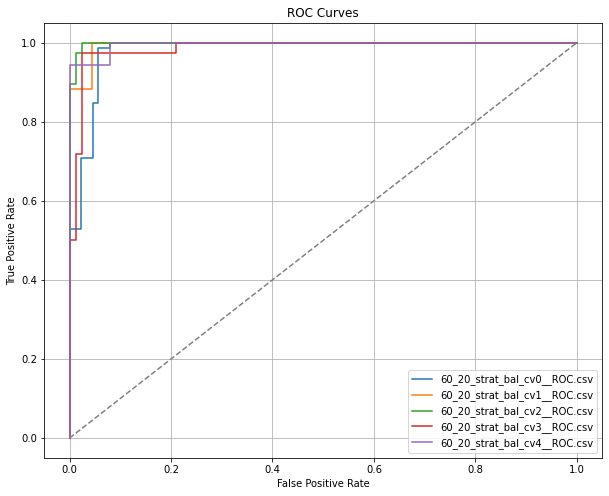

In [18]:
import os
import pandas as pd
import matplotlib.pyplot as plt

# Directory containing CSV files
directory = '/beegfs/ws/1/issr292b-workspace_MK1/roc_data/'

# Initialize an empty list to store ROC data
roc_data = []
legend = []

# Loop through the CSV files in the directory
for filename in os.listdir(directory):
    if filename.endswith('.csv'):
        filepath = os.path.join(directory, filename)
        print(filepath)
        df = pd.read_csv(filepath)
        roc_data.append((df['FPR'], df['TPR']))
        legend.append(filename)
        print(legend)

# Create a plot
plt.figure(figsize=(10, 8))

# Plot each ROC curve
for i, (fpr, tpr) in enumerate(roc_data):
    leg = legend[i]
    plt.plot(fpr, tpr, label=leg)
    
plt.plot([0,1], [0,1], linestyle='--',color='gray')

# Customize the plot (labels, title, legend, etc. as needed)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves')
plt.legend()
plt.grid()

output_directory = '/beegfs/ws/1/issr292b-workspace_MK1/plots/'
os.makedirs(output_directory, exist_ok=True)
output_file = os.path.join(output_directory, 'roc_curve_60_20_fold_comp.png')

plt.savefig(output_file)

# Show the plot
plt.show()


[]

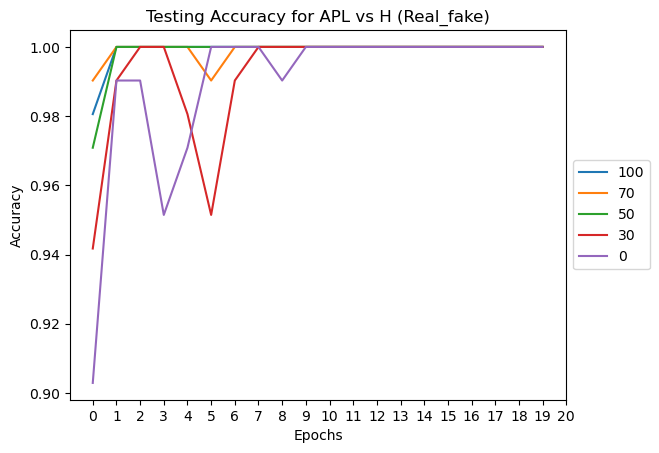

In [48]:
import matplotlib.pyplot as plt

temp_key = [100,70,50,30,0]
 
for key in temp_key:
    plt.plot(accuracy[key]['Epoch'], accuracy[key]["Accuracy"], label=key)
    plt.legend()
    plt.legend()
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.title('Testing Accuracy for APL vs H (Real_fake)')
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

    plt.xticks(np.arange(0, 21, 1.0))
    

plt.savefig('test.png', bbox_inches="tight")